In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
# Load the training and test datasets
df_train = pd.read_csv('/content/drive/MyDrive/ISI/project/stats/credit_score/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ISI/project/stats/credit_score/test.csv')

df_train.head()

<ipython-input-105-54ef98da92a1>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('/content/drive/MyDrive/ISI/project/stats/credit_score/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [106]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [107]:
# Add an identifier to split later
df_train['is_train'] = 1
df_test['is_train'] = 0

# Combine the datasets
df = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

In [108]:
for col in df.columns:
    print(f"Column: {col} ({df[col].nunique()} unique values)")
    print(df[col].unique())
    print("-" * 50)

Column: ID (150000 unique values)
['0x1602' '0x1603' '0x1604' ... '0x25fef' '0x25ff0' '0x25ff1']
--------------------------------------------------
Column: Customer_ID (12500 unique values)
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
--------------------------------------------------
Column: Month (12 unique values)
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
--------------------------------------------------
Column: Name (10139 unique values)
['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
--------------------------------------------------
Column: Age (2524 unique values)
['23' '-500' '28_' ... '326' '7910' '5826']
--------------------------------------------------
Column: SSN (12501 unique values)
['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']
--------------------------------------------------
Col

In [109]:
# Basic info
df.info()

# Basic statistics
df.describe()  # includes categorical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  o

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,is_train
count,127500.000000,150000.000000,150000.000000,150000.000000,150000.000000,147000.000000,150000.000000,150000.000000,150000.000000
mean,4190.115139,17.006940,22.623447,71.234907,21.063400,28.529014,32.283309,1432.513579,0.666667
std,3180.489657,117.069476,129.143006,461.537193,14.860154,194.456058,5.113315,8403.759977,0.471406
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000,0.000000
25%,1625.265833,3.000000,4.000000,8.000000,10.000000,3.000000,28.054731,30.947775,0.000000
50%,3091.000000,6.000000,5.000000,13.000000,18.000000,6.000000,32.297058,71.280006,1.000000
75%,5948.454596,7.000000,7.000000,20.000000,28.000000,9.000000,36.487954,166.279555,1.000000
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2597.000000,50.000000,82398.000000,1.000000


In [110]:
# Total missing values per column
df.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,15000
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,22500
Num_Bank_Accounts,0


In [111]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Fill numerical NaNs with median
for col in numerical_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

In [112]:
import re

def clean_numbers(text):
    if pd.isna(text):
        return np.nan
    # Extract the first valid number (handles negatives/decimals)
    match = re.search(r"-?\d+\.?\d*", str(text))
    return float(match.group()) if match else np.nan

# Apply to numeric columns
numeric_cols = [
    'Age', 'Annual_Income', 'Num_of_Loan',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
    'Outstanding_Debt','Amount_invested_monthly', 'Monthly_Balance'
]
for col in numeric_cols:
    df[col] = df[col].apply(clean_numbers)
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert anything non-numeric to NaN
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

In [113]:
# # List of columns to clean and convert
# numeric_columns = [
#     'Age', 'Annual_Income', 'Num_of_Loan',
#     'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
#     'Outstanding_Debt','Amount_invested_monthly', 'Monthly_Balance'
# ]

# # Apply median imputation and convert to numeric
# for col in numeric_columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert anything non-numeric to NaN
#     median_value = df[col].median()
#     df[col] = df[col].fillna(median_value)  # Fill NaN with median


In [114]:
df.replace(['-', '--', '-----', 'NaN', 'nan', 'N/A', 'n/a'], pd.NA, inplace=True)

In [115]:
df['Occupation'] = df['Occupation'].replace('_______', 'Others')

In [116]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace({'!@9#%_Missing': 'Missing'})

In [117]:
import re

categorical_columns = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# Step 1: Clean specific issues

# Replace '-' in Credit_Mix with mode
df['Credit_Mix'] = df['Credit_Mix'].replace('_', df['Credit_Mix'].mode()[0])

# Replace 'NM' in Payment_of_Min_Amount with 'No'
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', 'No')

# Replace invalid Payment_Behaviour values (non-alphanumeric + underscore, hyphen, space allowed)
valid_pattern = re.compile(r'^[\w\s-]+$')
pb_mode = df['Payment_Behaviour'].mode()[0]
df['Payment_Behaviour'] = df['Payment_Behaviour'].apply(
    lambda x: x if isinstance(x, str) and valid_pattern.match(x) else pb_mode
)

# Step 2: Fill remaining NaNs in categorical columns with their mode
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Step 3: Map Credit Score to ordinal values
credit_score_mapping = {'Poor': 1, 'Standard': 2, 'Good': 3}
df['Credit_Score'] = df['Credit_Score'].map(credit_score_mapping)

# Step 4: One-hot encode the categorical columns (keep originals)
df_encoded = pd.get_dummies(df[categorical_columns], prefix=categorical_columns, drop_first=True).astype(int)

# Step 5: Merge encoded columns back
df = pd.concat([df, df_encoded], axis=1)


In [118]:
import numpy as np

def convert_to_months(text):
    try:
        if isinstance(text, str):
            parts = text.split(' ')
            years = int(parts[0].replace('Years', '').strip())
            months = int(parts[3].replace('Months', '').strip())
            return years * 12 + months
    except:
        return np.nan


In [119]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_months)

# Now you can safely convert to float
df['Credit_History_Age'] = df['Credit_History_Age'].astype(float)

# Fill remaining NAs with median
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(df['Credit_History_Age'].median())


In [120]:
df['Type_of_Loan'] = df['Type_of_Loan'].fillna(df['Type_of_Loan'].mode()[0])

In [121]:
# Double-check for any remaining missing values
df.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,15000
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 52 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   ID                                                  150000 non-null  object 
 1   Customer_ID                                         150000 non-null  object 
 2   Month                                               150000 non-null  object 
 3   Name                                                135000 non-null  object 
 4   Age                                                 150000 non-null  float64
 5   SSN                                                 150000 non-null  object 
 6   Occupation                                          150000 non-null  object 
 7   Annual_Income                                       150000 non-null  float64
 8   Monthly_Inhand_Salary                               150000 non-n

In [123]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
count,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,110.337940,1.730552e+05,4025.247868,17.006940,22.623447,71.234907,3.141093,21.063400,29.728047,10.363839,...,0.062120,0.058787,0.243980,0.565720,0.523227,0.176413,0.113273,0.104513,0.137987,0.330713
std,684.066779,1.404215e+06,2958.412598,117.069476,129.143006,461.537193,63.910655,14.860154,216.575690,6.716338,...,0.241374,0.235226,0.429482,0.495664,0.499462,0.381173,0.316928,0.305926,0.344887,0.470472
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.945549e+04,1792.520417,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.420000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,3.757861e+04,3091.000000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,7.279690e+04,5363.071667,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.640000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5799.000000,1496.000000,67.000000,4399.000000,36.970000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [124]:
# 1. Split the dataset
df_train_clean = df[df['is_train'] == 1].copy()
df_test_clean = df[df['is_train'] == 0].copy()

# 2. Drop unnecessary columns
columns_to_drop = ['ID', 'Customer_ID', 'Name', 'SSN', 'is_train']
df_train_clean.drop(columns=columns_to_drop, axis=1, inplace=True)
df_test_clean.drop(columns=columns_to_drop, axis=1, inplace=True)

numeric_cols = df_train_clean.select_dtypes(include=['int64', 'float64']).columns
df_train_clean = df_train_clean[(df_train_clean[numeric_cols] >= 0).all(axis=1)]
df_train_clean = df_train_clean[(df_train_clean['Age'] >= 18) & (df_train_clean['Age'] <= 60)]

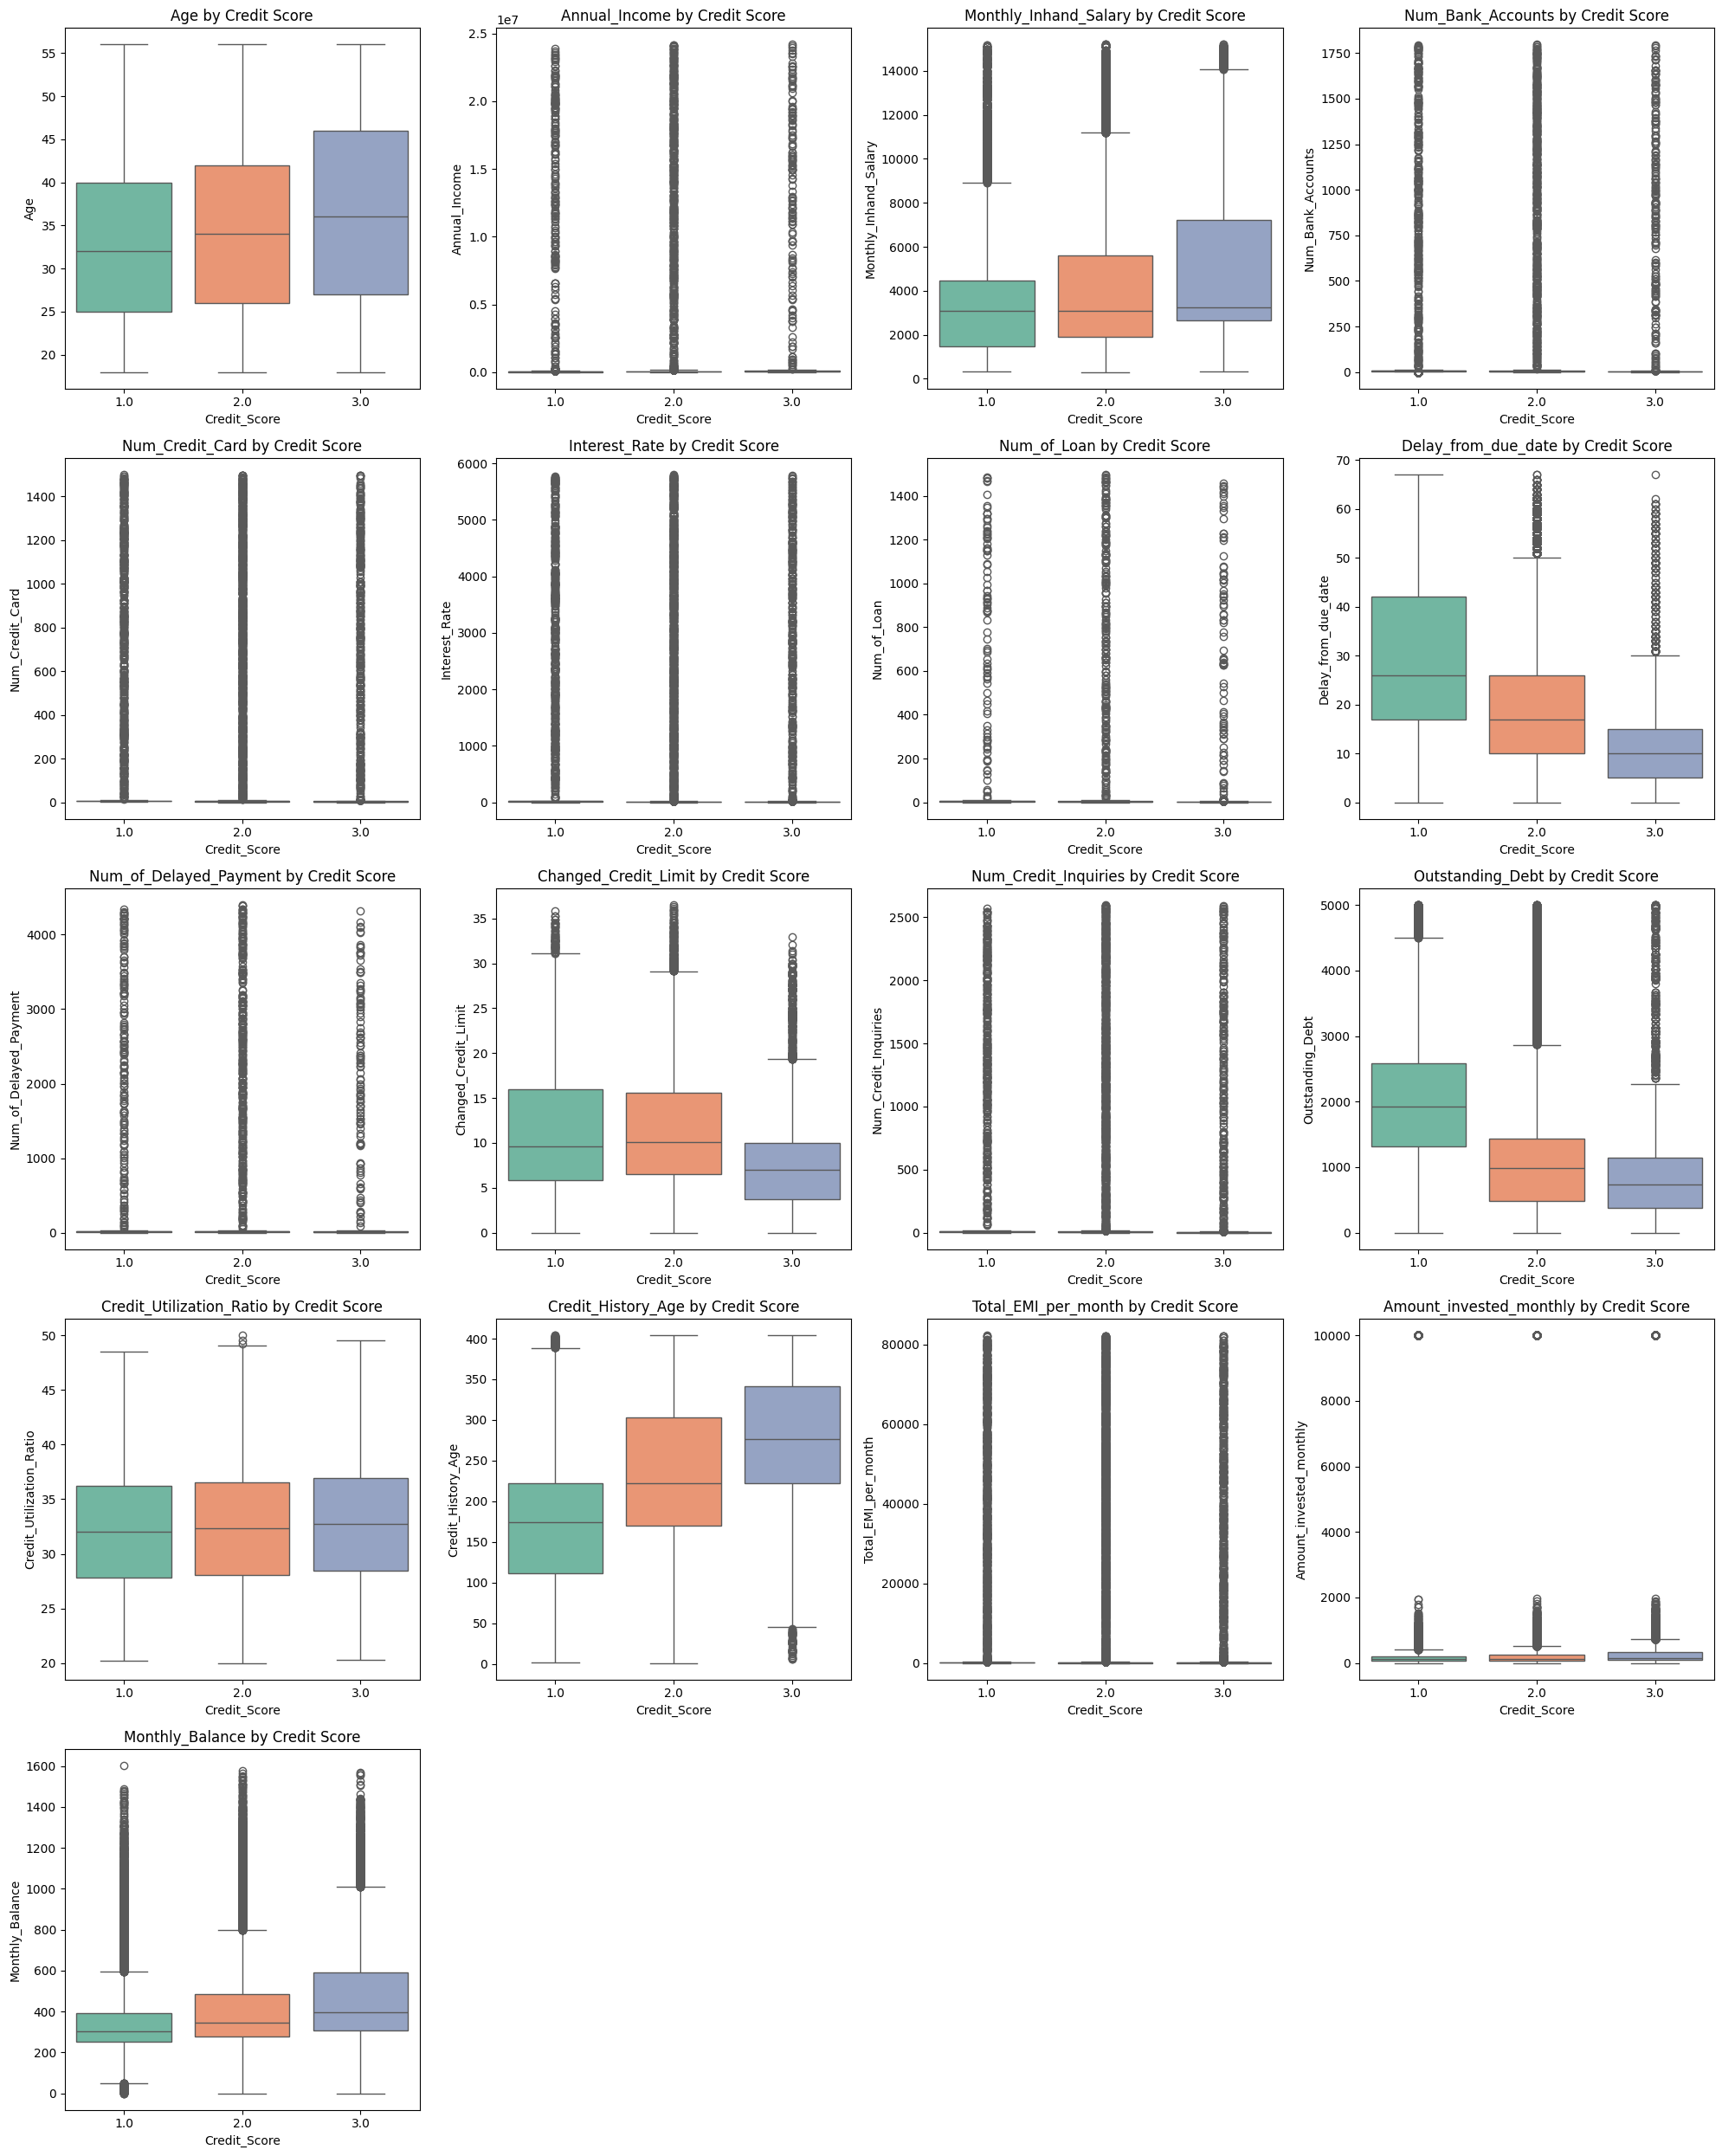

In [125]:
categorical_columns = [
    'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount','Payment_Behaviour'
]

# Identify numerical features (excluding Credit_Score and one-hot encoded columns)
num_cols = [col for col in df_train_clean.select_dtypes(include=['int64','float64']).columns
            if not col.startswith(tuple(categorical_columns)) and col != 'Credit_Score']

# Calculate the number of rows and columns for subplots
num_rows = int(np.ceil(len(num_cols) / 4))  # Adjust 4 as needed for desired columns

# Create box plots with adjusted grid
plt.figure(figsize=(20, 5 * num_rows))  # Adjust figure height based on rows
for i, col in enumerate(num_cols, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(x='Credit_Score', y=col, hue='Credit_Score', data=df_train_clean, palette='Set2', legend=False)
    plt.title(f'{col} by Credit Score')
plt.tight_layout()
plt.show()

In [126]:
for col in numeric_cols:
    Q1 = df_train_clean[col].quantile(0.25)
    Q3 = df_train_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_train_clean = df_train_clean[(df_train_clean[col] >= lower_bound) & (df_train_clean[col] <= upper_bound)]

In [127]:
df_train_clean.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
count,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,...,2674.000000,2674.0,2674.0,2674.0,2674.000000,2674.0,2674.0,2674.0,2674.0,2674.000000
mean,33.968212,34523.741415,2912.687078,5.525056,5.318250,14.403889,3.179880,18.797681,13.714286,11.045954,...,0.332461,0.0,0.0,1.0,0.642857,0.0,0.0,0.0,0.0,0.743829
std,9.840294,24150.866232,1876.398746,2.035490,1.820835,7.343422,2.039498,10.262320,4.417414,5.206497,...,0.471183,0.0,0.0,0.0,0.479247,0.0,0.0,0.0,0.0,0.436599
min,18.000000,7021.910000,361.603333,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000,...,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,26.000000,16313.030000,1451.386667,4.000000,4.000000,8.250000,2.000000,11.000000,11.000000,7.592500,...,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,34.000000,27155.640000,2703.159167,6.000000,5.000000,14.000000,3.000000,18.000000,14.000000,10.740000,...,0.000000,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,1.000000
75%,42.000000,44880.555000,3340.206875,7.000000,7.000000,19.000000,4.000000,25.000000,17.000000,15.020000,...,1.000000,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,1.000000
max,56.000000,122730.720000,10020.553333,10.000000,10.000000,34.000000,9.000000,55.000000,27.000000,27.850000,...,1.000000,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,1.000000


In [128]:
from scipy.stats import skew
import numpy as np

# Identify numeric columns
numeric_cols = df_train_clean.select_dtypes(include=['int64', 'float64']).columns

# Apply log1p to highly skewed columns
for col in numeric_cols:
    col_skewness = skew(df_train_clean[col].dropna())
    if abs(col_skewness) > 0.75:
        # Shift values if there are 0 or negative values
        min_val = min(df_train_clean[col].min(), df_test_clean[col].min())
        shift = 1 - min_val if min_val <= 0 else 0
        df_train_clean[col] = np.log1p(df_train_clean[col] + shift)
        df_test_clean[col] = np.log1p(df_test_clean[col] + shift)


<ipython-input-128-43180494079d>:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  col_skewness = skew(df_train_clean[col].dropna())


In [129]:
df_train_clean.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
count,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,...,2674.000000,2674.0,2674.0,2674.0,2674.000000,2674.0,2674.0,2674.0,2674.0,2674.000000
mean,33.968212,10.219400,7.771886,5.525056,5.318250,14.403889,3.179880,3.170293,13.714286,11.045954,...,0.332461,0.0,0.0,1.0,0.642857,0.0,0.0,0.0,0.0,0.994744
std,9.840294,0.680636,0.659081,2.035490,1.820835,7.343422,2.039498,0.407694,4.417414,5.206497,...,0.471183,0.0,0.0,0.0,0.479247,0.0,0.0,0.0,0.0,0.177026
min,18.000000,8.856933,5.893309,0.000000,1.000000,1.000000,0.000000,1.945910,0.000000,0.010000,...,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.693147
25%,26.000000,9.699781,7.280963,4.000000,4.000000,8.250000,2.000000,2.890372,11.000000,7.592500,...,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.693147
50%,34.000000,10.209377,7.902546,6.000000,5.000000,14.000000,3.000000,3.218876,14.000000,10.740000,...,0.000000,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,1.098612
75%,42.000000,10.711782,8.114087,7.000000,7.000000,19.000000,4.000000,3.465736,17.000000,15.020000,...,1.000000,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,1.098612
max,56.000000,11.717756,9.212493,10.000000,10.000000,34.000000,9.000000,4.127134,27.000000,27.850000,...,1.000000,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,1.098612


In [130]:
df_train_clean.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
81,February,40.0,Teacher,10.426803,7.989427,5,5,20,3.0,"Credit-Builder Loan, Personal Loan, and Auto Loan",...,1,0,0,1,1,0,0,0,0,0.693147
83,April,40.0,Teacher,10.426803,7.989427,5,5,20,3.0,"Credit-Builder Loan, Personal Loan, and Auto Loan",...,1,0,0,1,1,0,0,0,0,0.693147
84,May,40.0,Teacher,10.426803,7.989427,5,5,20,3.0,"Credit-Builder Loan, Personal Loan, and Auto Loan",...,1,0,0,1,1,0,0,0,0,1.098612
86,July,40.0,Teacher,10.426803,7.989427,5,5,20,3.0,"Credit-Builder Loan, Personal Loan, and Auto Loan",...,1,0,0,1,1,0,0,0,0,1.098612
87,August,41.0,Teacher,10.426803,7.989427,5,5,20,3.0,"Credit-Builder Loan, Personal Loan, and Auto Loan",...,1,0,0,1,1,0,0,0,0,0.693147


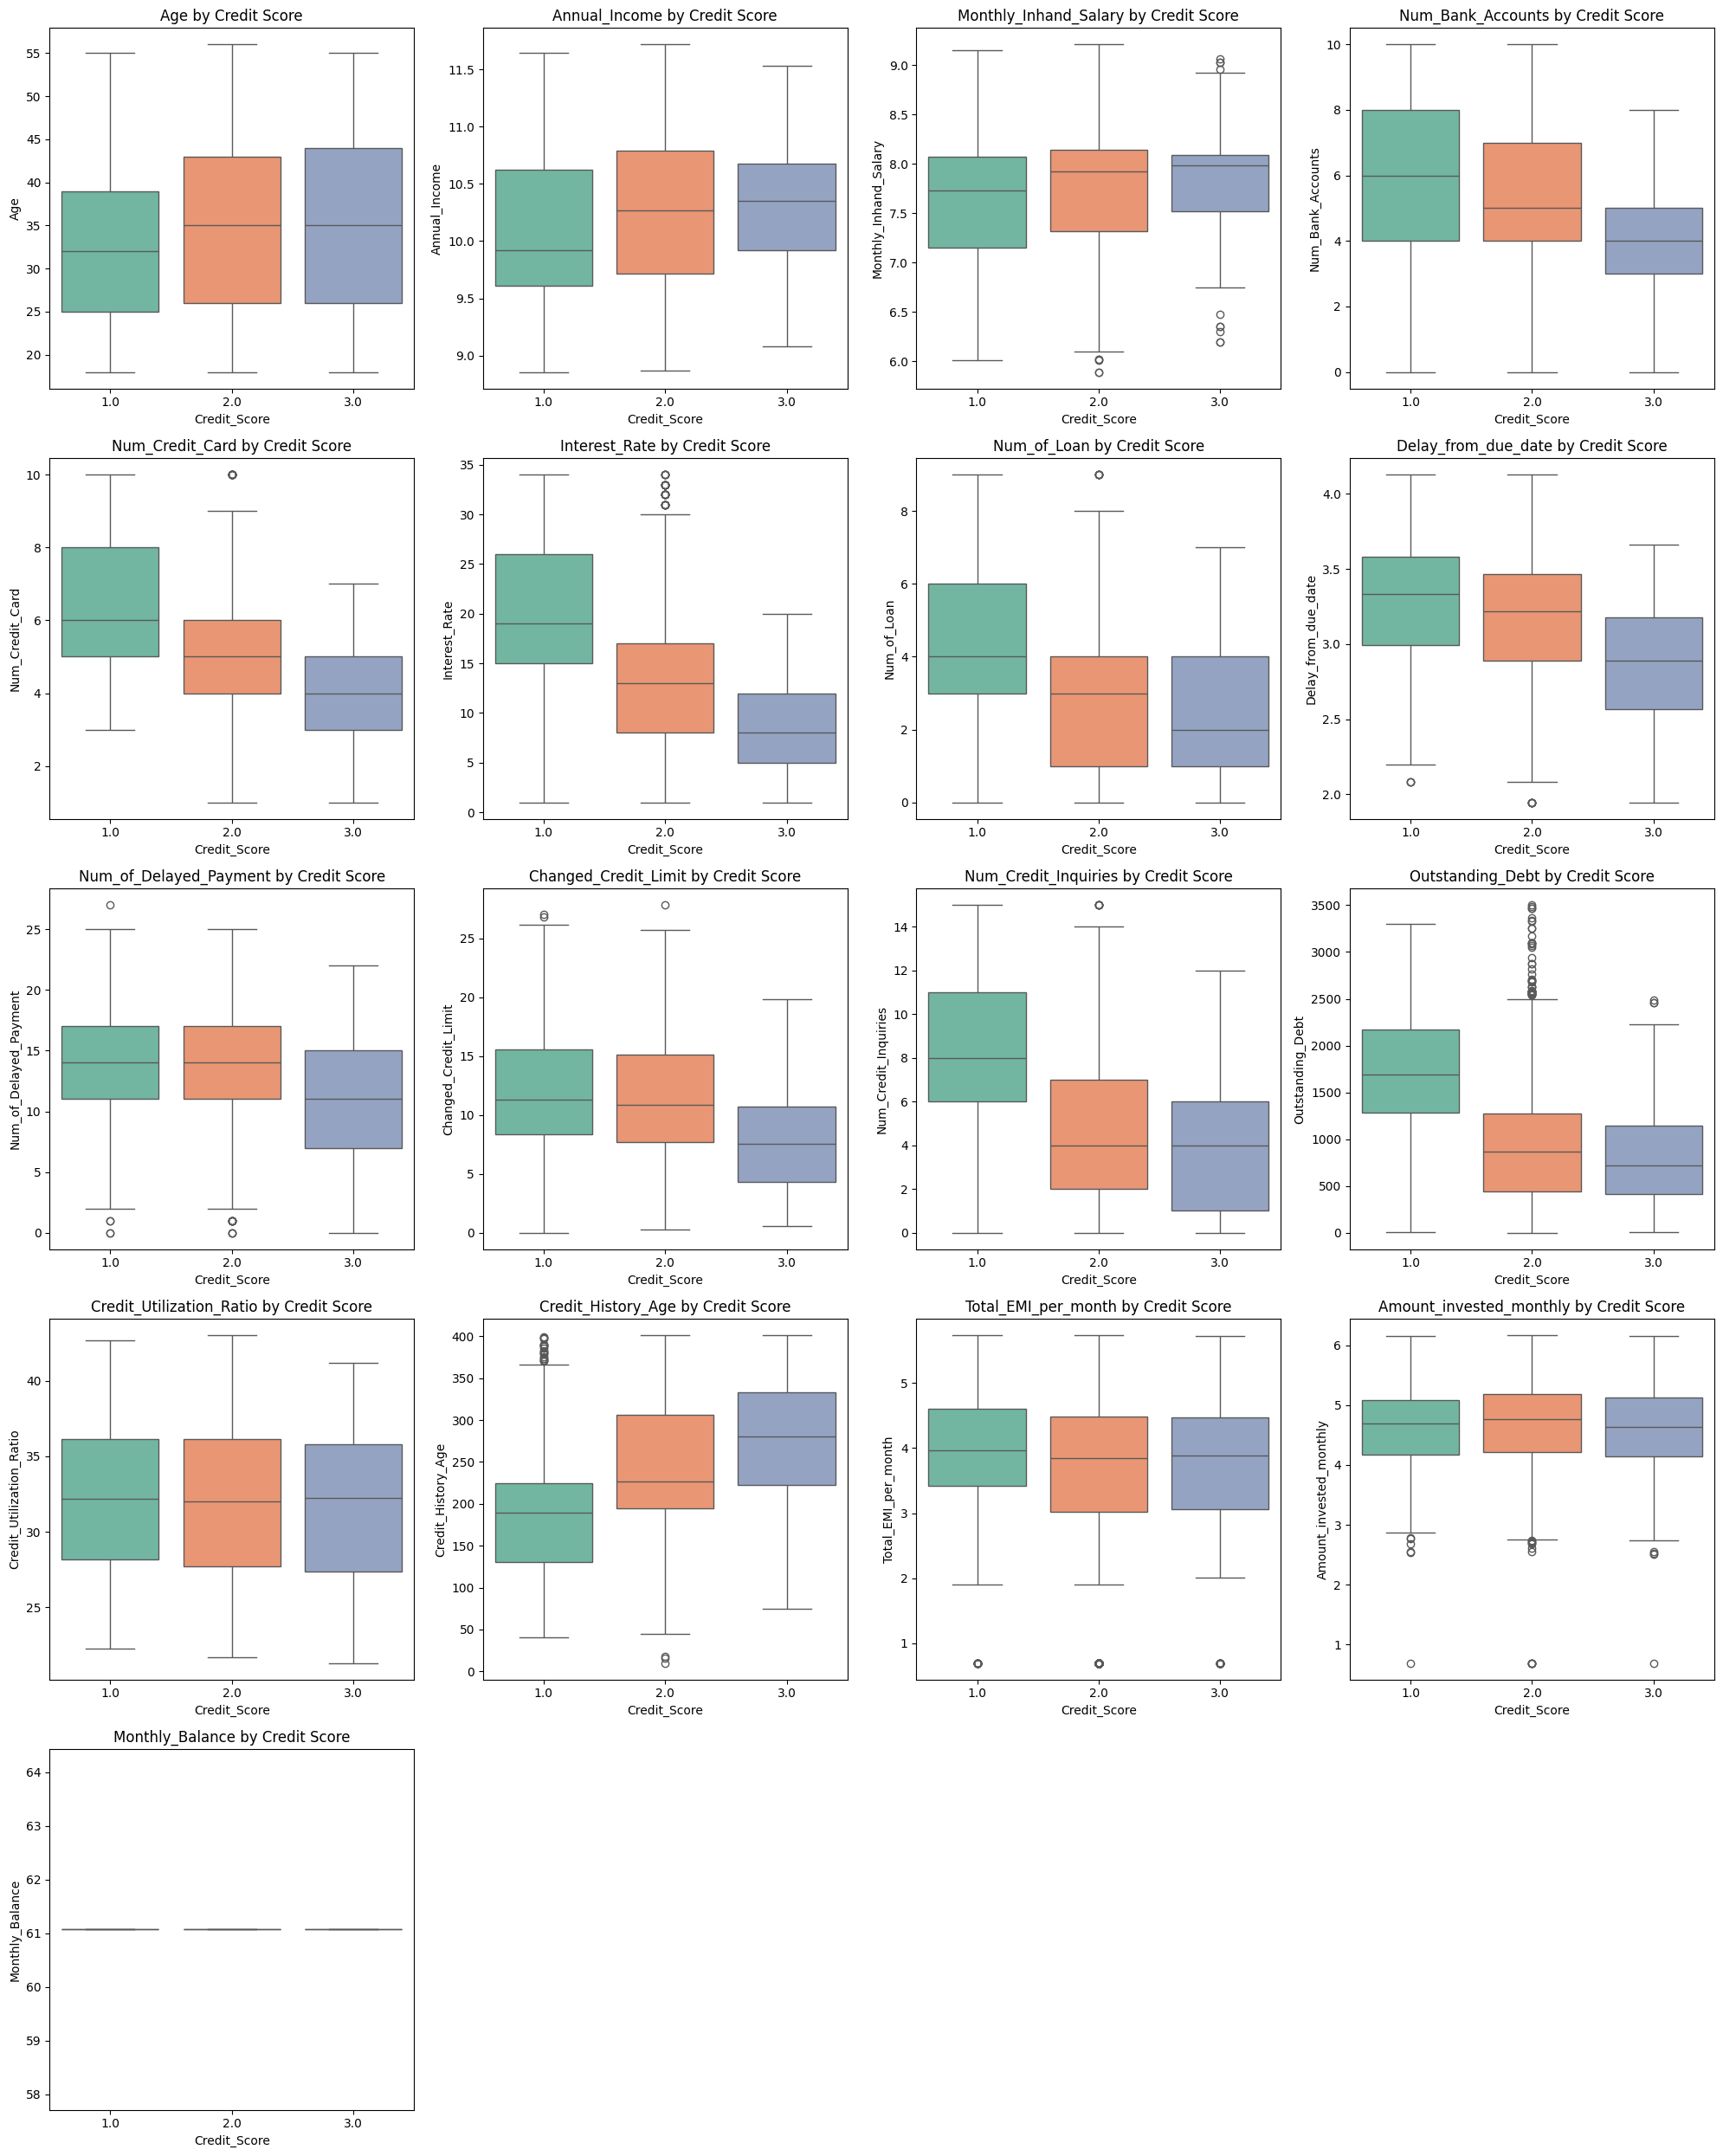

In [131]:
categorical_columns = [
    'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount','Payment_Behaviour'
]

# Identify numerical features (excluding Credit_Score and one-hot encoded columns)
num_cols = [col for col in df_train_clean.select_dtypes(include=['int64','float64']).columns
            if not col.startswith(tuple(categorical_columns)) and col != 'Credit_Score']

# Calculate the number of rows and columns for subplots
num_rows = int(np.ceil(len(num_cols) / 4))  # Adjust 4 as needed for desired columns

# Create box plots with adjusted grid
plt.figure(figsize=(20, 5 * num_rows))  # Adjust figure height based on rows
for i, col in enumerate(num_cols, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(x='Credit_Score', y=col, hue='Credit_Score', data=df_train_clean, palette='Set2', legend=False)
    plt.title(f'{col} by Credit Score')
plt.tight_layout()
plt.show()

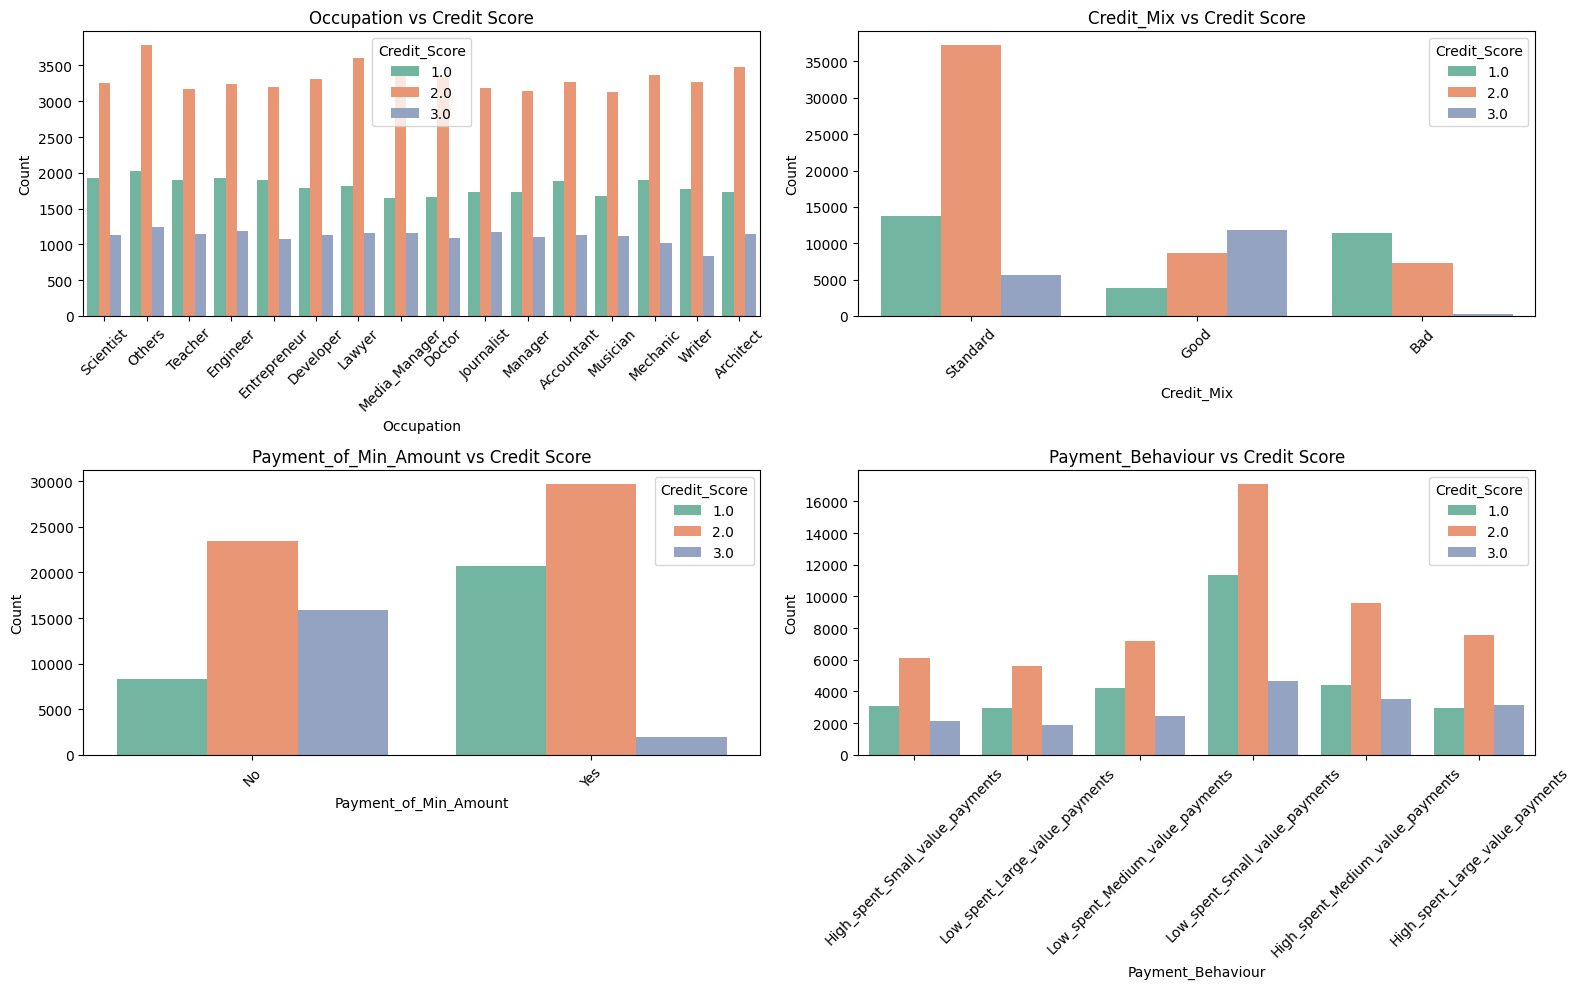

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the original columns for plotting
categorical_columns = [
    'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'
]

# Calculate rows and columns for subplots
num_cols = 2
num_rows = int(np.ceil(len(categorical_columns) / num_cols))

plt.figure(figsize=(16, 5 * num_rows))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=df, x=col, hue='Credit_Score', palette='Set2')
    plt.title(f'{col} vs Credit Score')
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

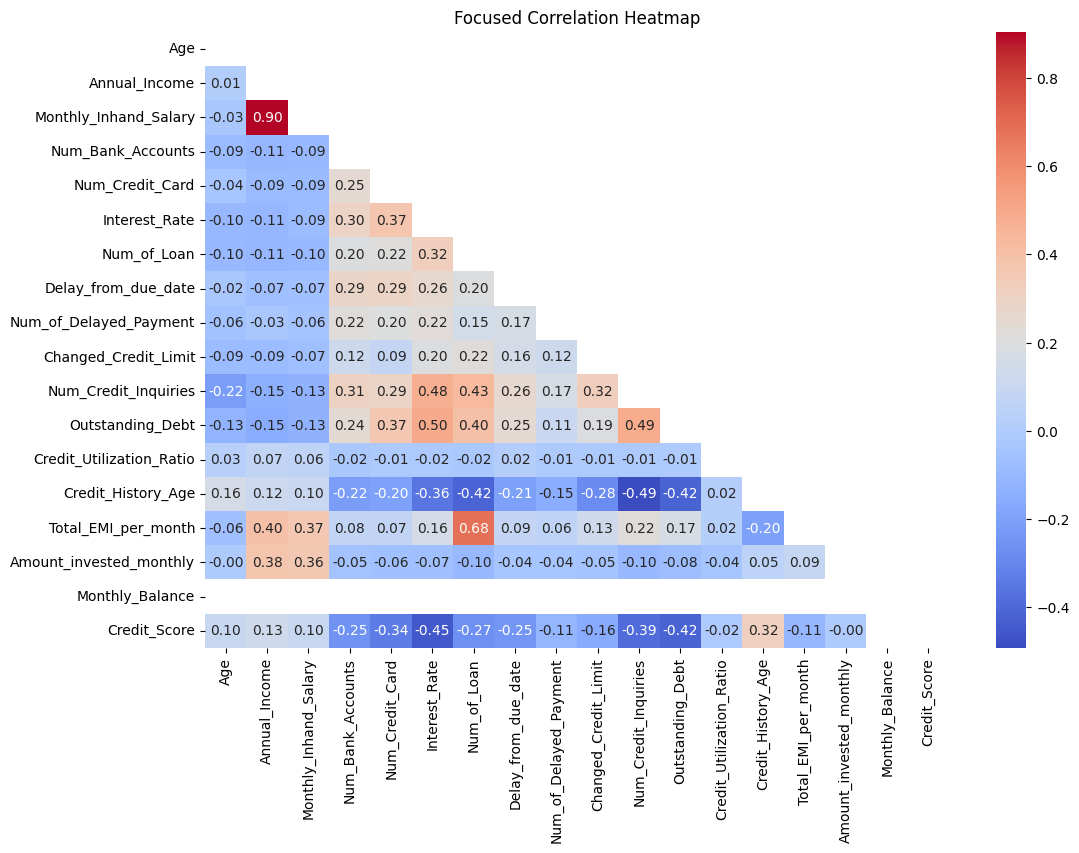

In [133]:
categorical_columns = [
    'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount','Payment_Behaviour'
]

# Identify numerical features (excluding Credit_Score and one-hot encoded columns)
num_cols = [col for col in df_train_clean.select_dtypes(include=['int64','float64']).columns
            if not col.startswith(tuple(categorical_columns)) and col != 'Credit_Score']

# Get all one-hot encoded columns
one_hot_cols = [col for col in df_train_clean.columns
                if any(col.startswith(cat) for cat in categorical_columns)]


# Select top numerical features + some one-hot encoded features
selected_cols = num_cols[:] + ['Credit_Score']

plt.figure(figsize=(12, 8))
corr = df_train_clean[selected_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            mask=np.triu(np.ones_like(corr, dtype=bool)))
plt.title('Focused Correlation Heatmap')
plt.show()

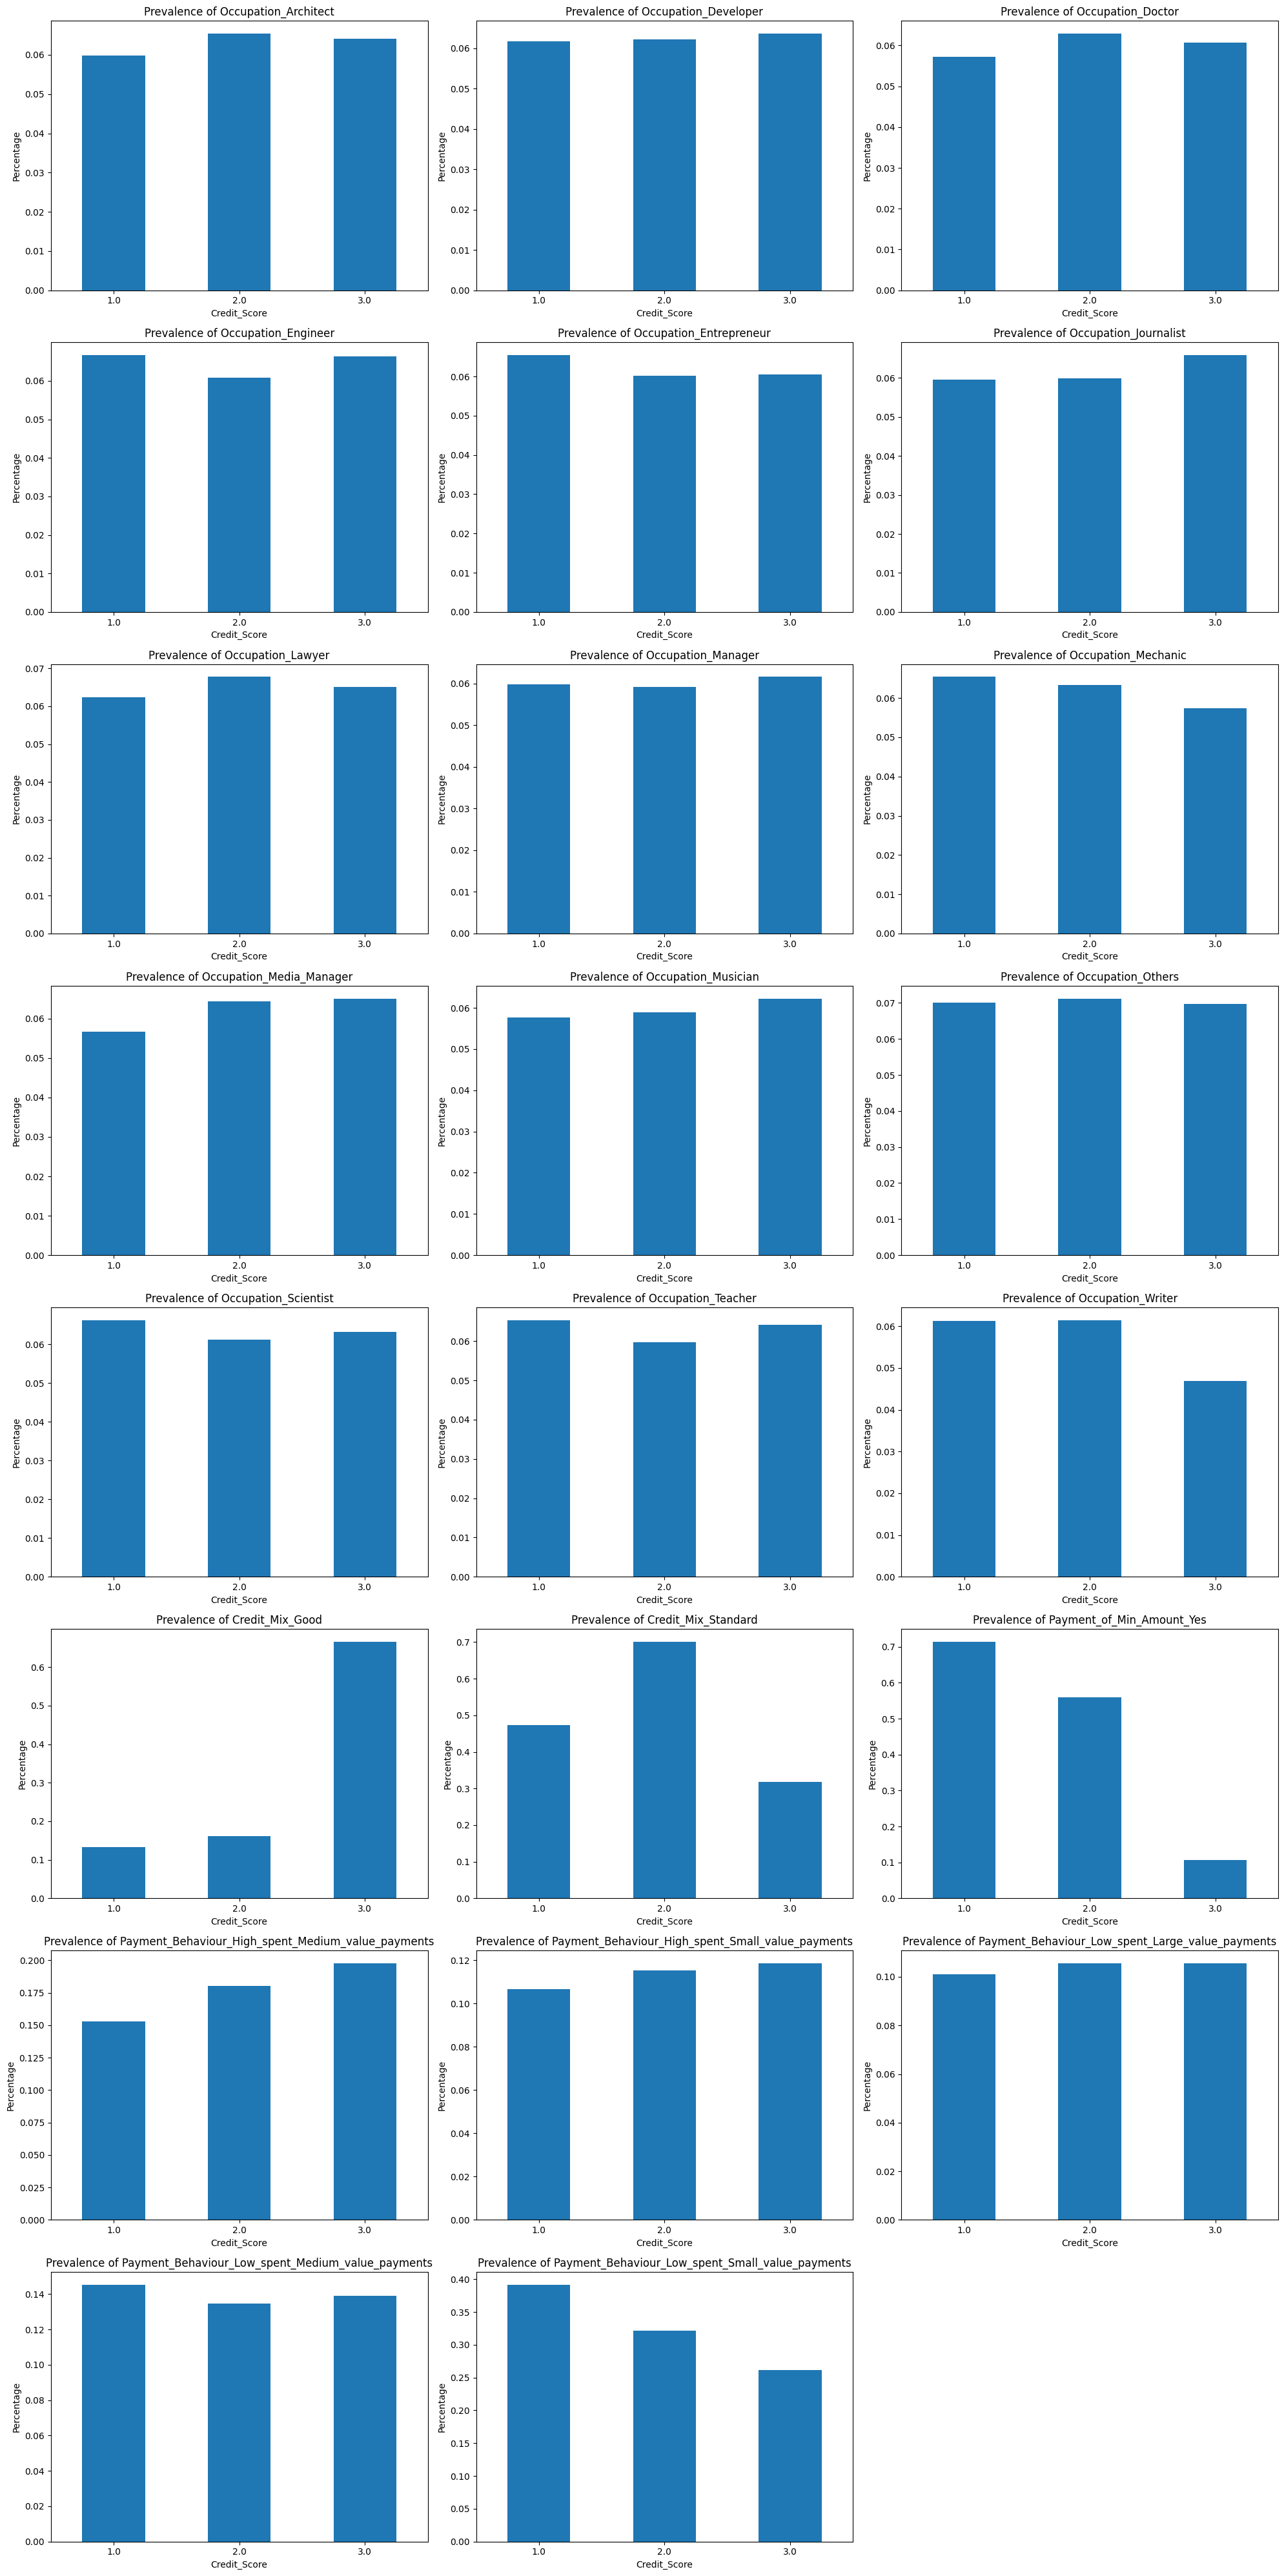

In [134]:
# List of one-hot encoded columns
one_hot_cols = df_encoded.columns.tolist()

# Plotting prevalence
num_cols = 3
num_rows = int(np.ceil(len(one_hot_cols) / num_cols))

plt.figure(figsize=(20, 5 * num_rows))
for i, col in enumerate(one_hot_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    df.groupby('Credit_Score')[col].mean().plot(kind='bar')  # df must have both 'Credit_Score' and one-hot columns
    plt.title(f'Prevalence of {col}')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



📊 Logistic Regression Evaluation Metrics:
              precision    recall  f1-score   support

        Poor       0.80      0.58      0.67       144
    Standard       0.78      0.93      0.85       350
        Good       0.62      0.20      0.30        41

    accuracy                           0.78       535
   macro avg       0.73      0.57      0.61       535
weighted avg       0.77      0.78      0.76       535



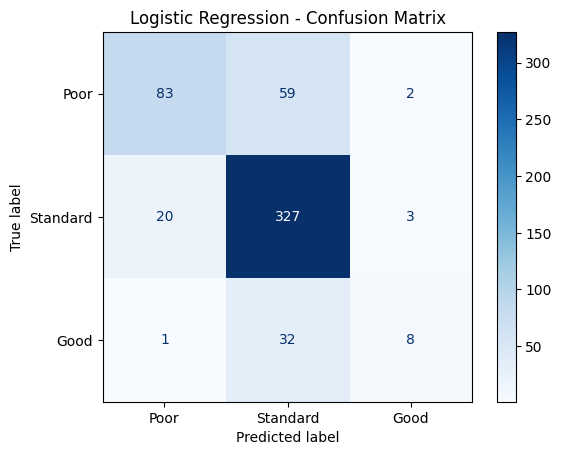


📊 Random Forest Evaluation Metrics:
              precision    recall  f1-score   support

        Poor       0.87      0.64      0.74       144
    Standard       0.80      0.95      0.87       350
        Good       0.64      0.17      0.27        41

    accuracy                           0.81       535
   macro avg       0.77      0.59      0.62       535
weighted avg       0.80      0.81      0.79       535



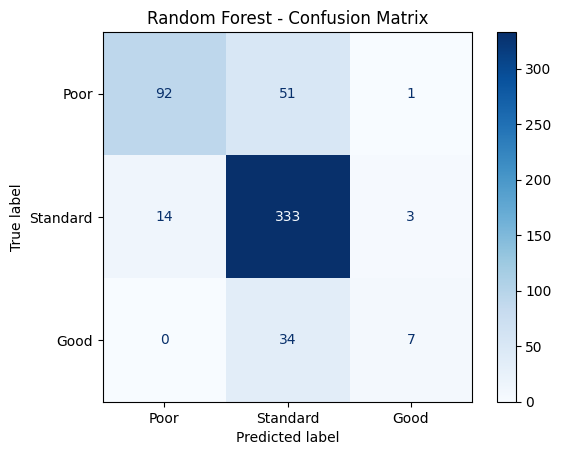


📊 SVM Evaluation Metrics:
              precision    recall  f1-score   support

        Poor       0.83      0.62      0.71       144
    Standard       0.78      0.94      0.85       350
        Good       0.50      0.07      0.13        41

    accuracy                           0.79       535
   macro avg       0.70      0.55      0.56       535
weighted avg       0.77      0.79      0.76       535



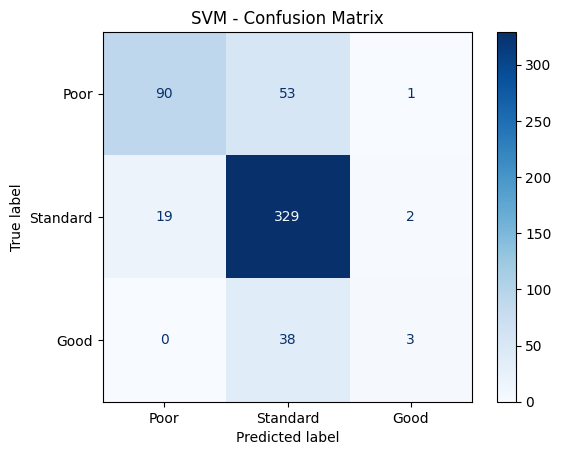

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:39:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 XGBoost Evaluation Metrics:
              precision    recall  f1-score   support

        Poor       0.82      0.65      0.72       144
    Standard       0.80      0.93      0.86       350
        Good       0.60      0.22      0.32        41

    accuracy                           0.80       535
   macro avg       0.74      0.60      0.64       535
weighted avg       0.79      0.80      0.78       535



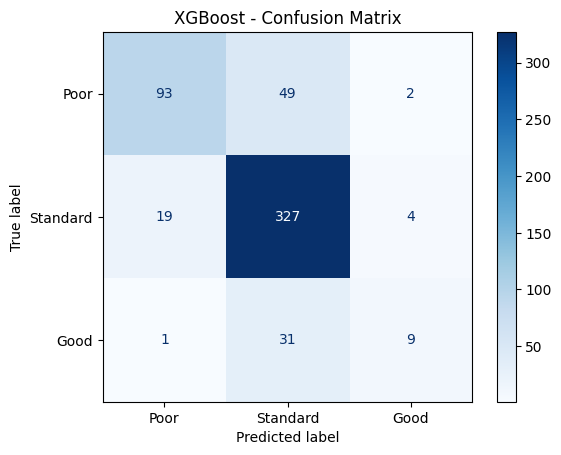


📈 Model Comparison:


,Accuracy,Precision,Recall,F1-Score
Random Forest,0.807477,0.803551,0.807477,0.786052
XGBoost,0.801869,0.793116,0.801869,0.784625
SVM,0.788785,0.773020,0.788785,0.760328
Logistic Regression,0.781308,0.773753,0.781308,0.759967


In [138]:
# Step 0: One-hot encode 'Month' and drop original categorical columns
df_cleaned = df_train_clean.copy()

# One-hot encode 'Month' (if not already done)
df_month_encoded = pd.get_dummies(df_cleaned['Month'], prefix='Month', drop_first=True)

# Drop original categorical columns
categorical_columns = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Month','Type_of_Loan']
df_cleaned = df_cleaned.drop(columns=categorical_columns)

# Merge encoded month
df_cleaned = pd.concat([df_cleaned, df_month_encoded], axis=1)

# ----- Step 1: Feature-target split -----
X = df_cleaned.drop(['Credit_Score'], axis=1)
y = df_cleaned['Credit_Score']

# ----- Step 2: Train-test split -----
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# ----- Step 3: Feature scaling -----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----- Step 4: Define models -----
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# ----- Step 5: Train, evaluate and plot -----
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
results = {}

for name, model in models.items():
    # Subtracting 1 from the target variable to start from 0 for XGBoost
    if name == "XGBoost":
        model.fit(X_train_scaled, y_train - 1)
        y_pred = model.predict(X_test_scaled) + 1  # Adding 1 back to predictions for evaluation
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    print(f"\n📊 {name} Evaluation Metrics:")
    print(classification_report(y_test, y_pred, target_names=['Poor', 'Standard', 'Good']))

    # Save metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted'),
    }

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Poor', 'Standard', 'Good'])
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# ----- Step 6: Compare model metrics -----
print("\n📈 Model Comparison:")
metrics_df = pd.DataFrame(results).T
display(metrics_df.sort_values("F1-Score", ascending=False))